In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bsnm = 'PCdata/32-30pts-eq_0m_t150000_t1000_Kawa0_4-sb_p'
num = np.arange(0, 6)*2
extension = '.txt'
namelist = []
helper=[]
for i in num:
    filename = bsnm+str(i)+extension
    helper.append(np.loadtxt(filename))
helper = np.array(helper)

In [4]:
basename1 = 'PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p' #actually pumping
basename2 = 'PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p'
basename3 = 'PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p'
# basename3 = 'PCdata/32-30pts-eq_0m_t150000_t1000_Kawa0_4-sb_p'
basename4 = 'PCdata/64-30pts-eq_0m_t100000_t1000_MisK_p'
extension = '.txt'
num = np.arange(0, 6)*2
namelist = []
basenames = [basename1, basename2, basename3, basename4]
all_data = []
for k in range(4):
    namelist=[]
    for i in num:
        filename = basenames[k]+str(i)+extension
        namelist.append(filename)
    namelist = np.array(namelist)
    data1 = []
    for i in namelist:
        data1.append(np.loadtxt(i))
        print(i)
    all_data.append(np.array(data1))
all_data = np.array(all_data)

all_data[3][3][3][0] = all_data[3][2][3][0]
all_data[3][3][6][0] = all_data[3][2][6][0]
for i in range(6):
    all_data[2][i][3] = helper[i][3]
    all_data[2][i][6] = helper[i][6]
    all_data[2][i][2] = all_data[2][i][2]*4
all_data[2][3][3][0] = all_data[2][4][3][0]
all_data[3][3][6][0] = all_data[3][2][6][0]

PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p0.txt
PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p2.txt
PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p4.txt
PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p6.txt
PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p8.txt
PCdata/64-30pts-eq_0m_t150000_t1000_Kawa0_2_p10.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p0.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p2.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p4.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p6.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p8.txt
PCdata/64-30pts-eq_0m_t100000_t1000_KawaCrit_p10.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p0.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p2.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p4.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p6.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p8.txt
PCdata/64-30pts-eq_0m_t100000_t1000_Kawa0_p10.txt
PCdata/64-30pts-eq_0m_t100000_t1000_MisK_p0.txt
PCdata/64-30pts-eq_0m_t100000_t1000_M

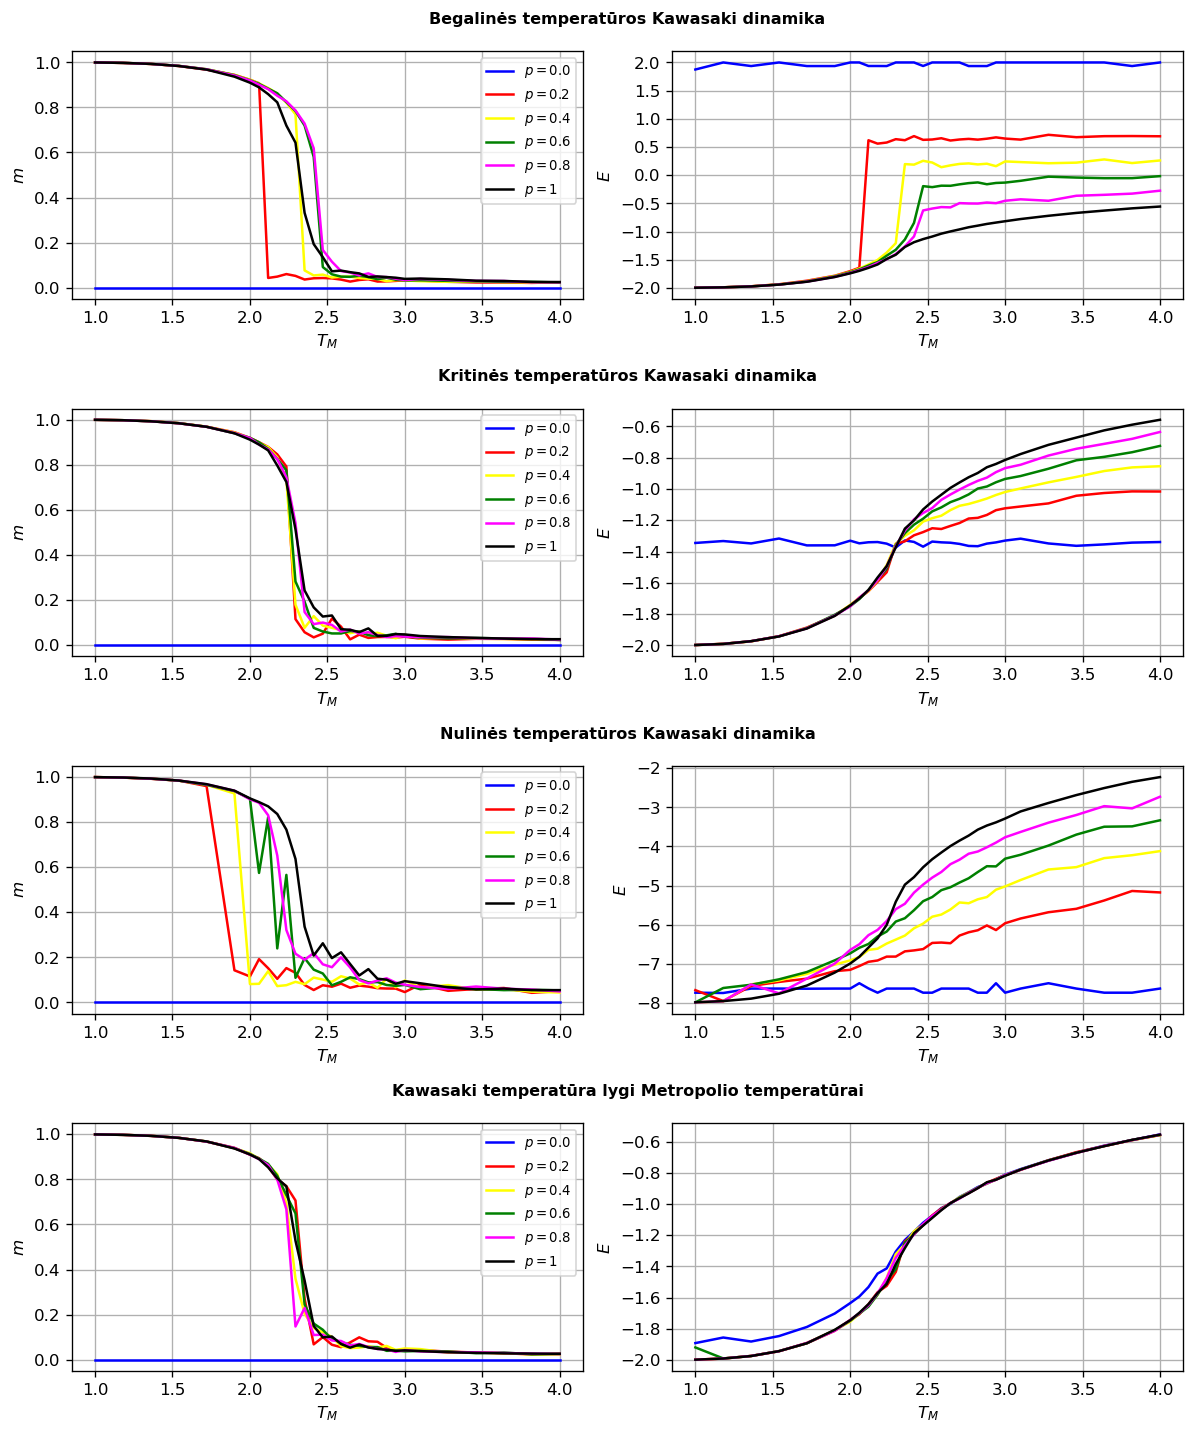

In [5]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

fig, ax = plt.subplots(all_data.shape[0], 2, figsize=(2*5, 3*all_data.shape[0]), dpi=120)
plt.rcParams.update({'font.size': 8})
# titles = [r'$T_{K} \rightarrow \infty$', r'$T_K = T_C$', r'$T_K = 0$', r'$T_K = T_M$' ]
titles = ['Begalinės temperatūros Kawasaki dinamika', 'Kritinės temperatūros Kawasaki dinamika', 'Nulinės temperatūros Kawasaki dinamika', 'Kawasaki temperatūra lygi Metropolio temperatūrai']
color = ['blue', 'red', 'yellow', 'green', 'magenta', 'black']
ext = []

grid = plt.GridSpec(all_data.shape[0], 2)
for i in range(all_data.shape[0]):
    ext.append([ax[i,0].get_window_extent().y0, ax[i,0].get_window_extent().width ])
    for j in range(all_data.shape[1]):        
#         magnetization
        if j == all_data.shape[1]-1:
            ax[i, 0].plot(all_data[i][j][0], all_data[i][j][3], color=color[j], label=r'$p=1$')    
        else:
            ax[i, 0].plot(all_data[i][j][0], all_data[i][j][3], color=color[j], label=r'$p=0.%d$' %num[j])
        
            
#         energy
        if j == all_data.shape[1]-1:
            ax[i, 1].plot(all_data[i][j][0], all_data[i][j][2]/64**2, color=color[j], label=r'$p=1$')    
        else:
            ax[i, 1].plot(all_data[i][j][0], all_data[i][j][2]/64**2, color=color[j], label=r'$p=0.%d$' %num[j])  
    ax[i, 0].grid()
    ax[i, 0].set(ylabel=r'$m$', xlabel=r'$T_M$')
    ax[i, 0].legend()
    ax[i, 1].grid()
    # ax[i, 1].legend()
    ax[i, 1].set(ylabel=r'$E$', xlabel=r'$T_M$') #'''title=titles[i],'''
    create_subtitle(fig, grid[i, ::], titles[i])
fig.tight_layout()

# plt.savefig('competing_all_EM.png')
# plt.savefig('competing_all_EM.pdf')

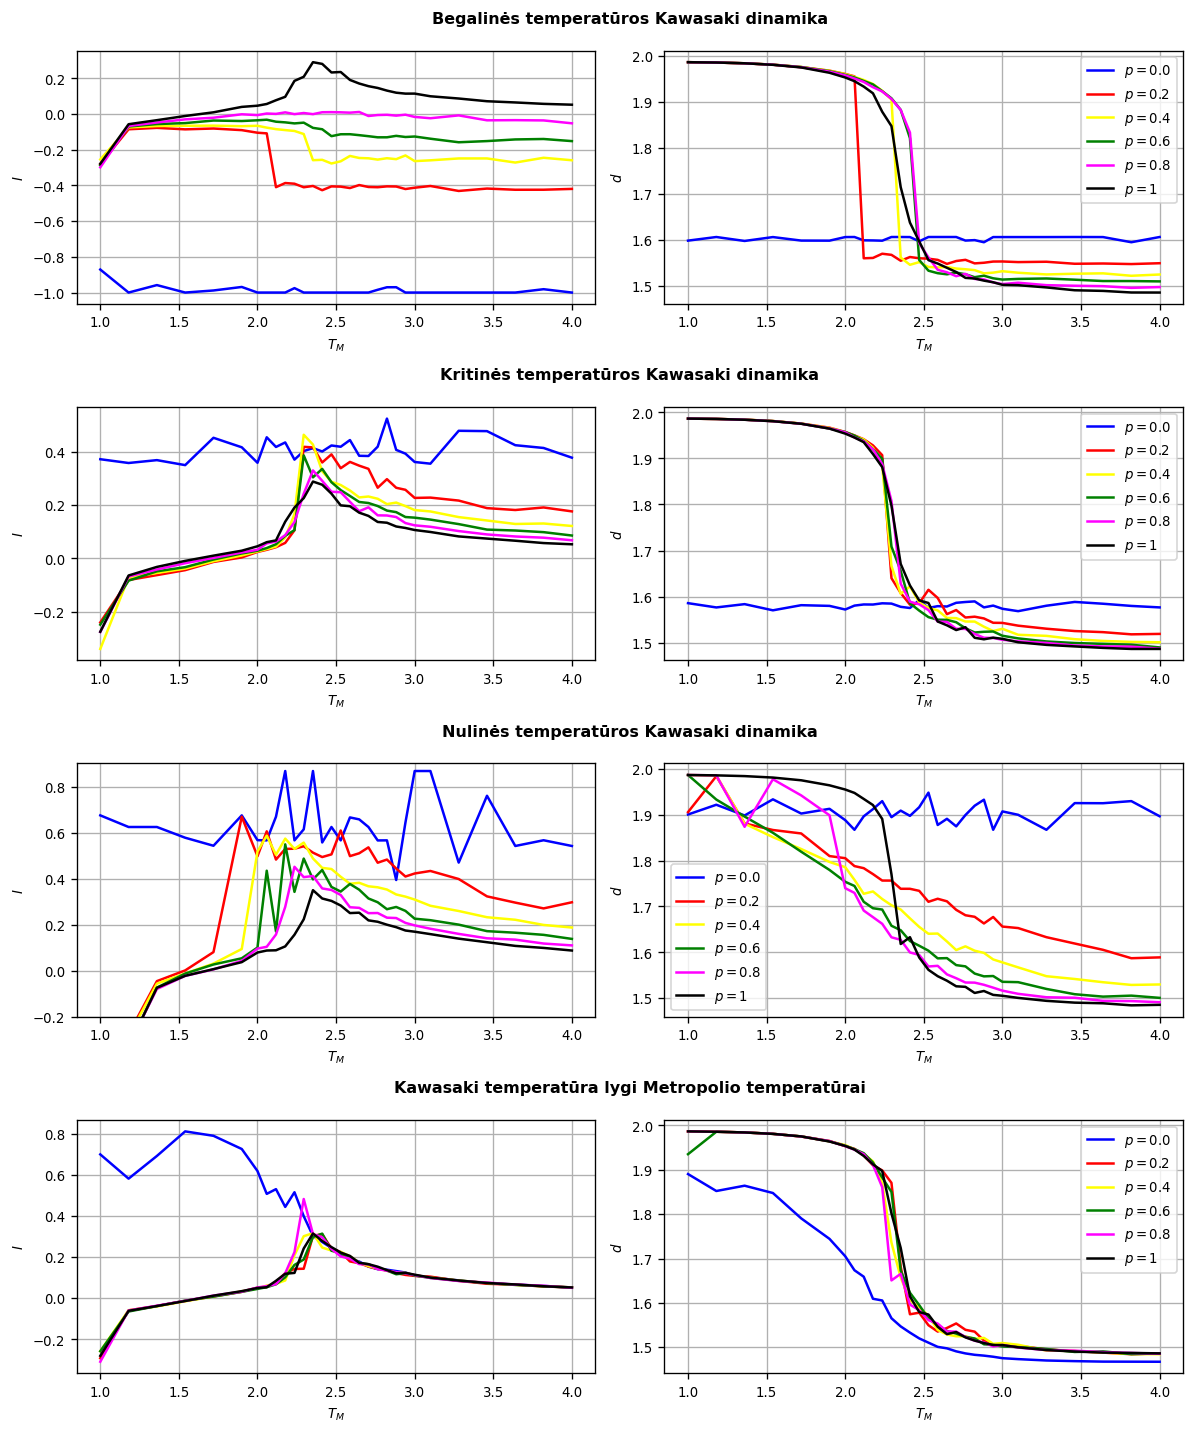

In [6]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

fig, ax = plt.subplots(all_data.shape[0], 2, figsize=(2*5, 3*all_data.shape[0]), dpi=120)
plt.rcParams.update({'font.size': 8})
# titles = [r'$T_{K} \rightarrow \infty$', r'$T_K = T_C$', r'$T_K = 0$', r'$T_K = T_M$' ]
titles = ['Begalinės temperatūros Kawasaki dinamika', 'Kritinės temperatūros Kawasaki dinamika', 'Nulinės temperatūros Kawasaki dinamika', 'Kawasaki temperatūra lygi Metropolio temperatūrai']
color = ['blue', 'red', 'yellow', 'green', 'magenta', 'black']
ext = []

grid = plt.GridSpec(all_data.shape[0], 2)
for i in range(all_data.shape[0]):
    ext.append([ax[i,0].get_window_extent().y0, ax[i,0].get_window_extent().width ])
    for j in range(all_data.shape[1]):        
#        diversity
        if j == all_data.shape[1]-1:
            ax[i, 0].plot(all_data[i][j][0], all_data[i][j][6], color=color[j], label=r'$p=1$')    
        else:
            ax[i, 0].plot(all_data[i][j][0], all_data[i][j][6], color=color[j], label=r'$p=0.%d$' %num[j])
        if (i == 2):
            # pass
            ax[i, 0].set(ylim=[-0.2, 0.9])
        
            
#         frac dim
        if j == all_data.shape[1]-1:
            ax[i, 1].plot(all_data[i][j][0], all_data[i][j][9], color=color[j], label=r'$p=1$')    
        else:
            ax[i, 1].plot(all_data[i][j][0], all_data[i][j][9], color=color[j], label=r'$p=0.%d$' %num[j])  
    ax[i, 0].grid()
    ax[i, 0].set(ylabel=r'$I$', xlabel=r'$T_M$')
    # ax[i, 0].legend()
    ax[i, 1].grid()
    ax[i, 1].legend()
    ax[i, 1].set(ylabel=r'$d$', xlabel=r'$T_M$')
    create_subtitle(fig, grid[i, ::], titles[i])
fig.tight_layout()

# plt.savefig('competing_all_IF.png')
# plt.savefig('competing_all_IF.pdf')